<a href="https://colab.research.google.com/github/amutharun/GenAIWorkshop/blob/main/Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learn how to count the number of tokens in a given document**

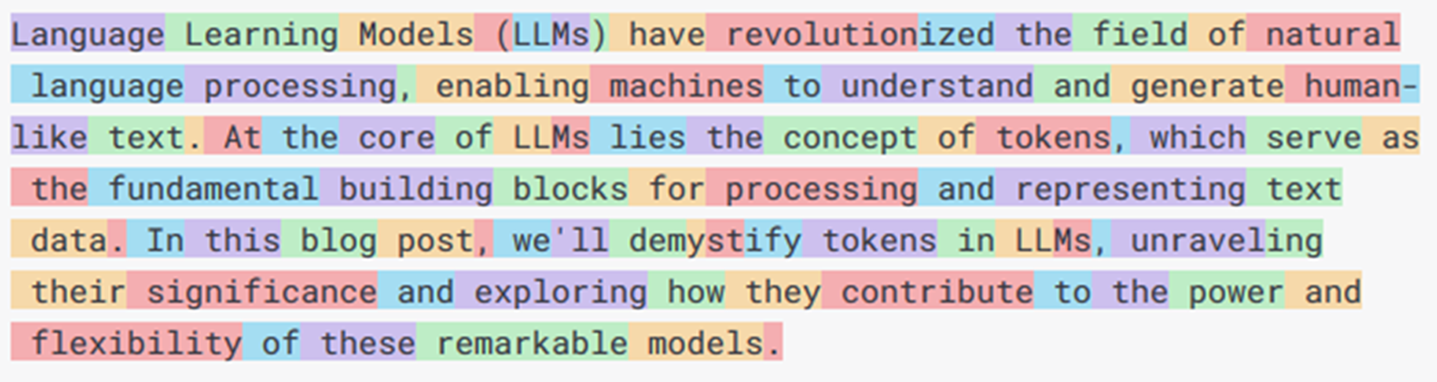

## **Tokens and Words**
Tokens and words are fundamental components in Natural Language Processing (NLP).   

**Word**

A word is the basic unit of language. It's a standalone entity that carries its own meaning. When we speak or write, we string these words together to communicate complex ideas, thoughts, and emotions.  

**Token**

A token, on the other hand, is a technical term in NLP. It refers to a piece of a whole, so a word could be a token, but a token could also represent a sentence or a phrase. The process of breaking down text into such tokens is known as tokenization.  
   
For instance, in the sentence "The cat sat on the mat", each word is a token when we're tokenizing by word. So, "The", "cat", "sat", "on", and "the mat" would each be separate tokens.  
   
Language Learning Models (LLMs) like GPT process text in this form - as tokens. This makes understanding the number of tokens in a text string important.


**How tokenization helps?**

It helps us know whether the length of the string is within the model's processing limits and allows us to calculate the cost of API calls, as they are often priced on the number of tokens.

**General Rule of Thumb**

# **1000 tokens ~= 750 words**
 1 token generally corresponds to ~4 characters of text for common English text. This translates to roughly ¾ of a word

# **Tokenization in Programming Languages**

## **Python**



*   tiktoken is a fast open-source tokenizer by OpenAI.
*   Given a text string (e.g., "tiktoken is great!") and an encoding (e.g., "cl100k_base"), a tokenizer can split the text string into a list of tokens (e.g., ["t", "ik", "token", " is", " great", "!"]).
* Encoding specifies how text is converted into tokens.
* Different models use different encodings.

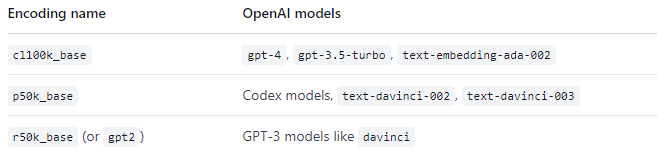





## **Tokenizer Packages by Language**

For cl100k_base and p50k_base encodings:

* Python: [tiktoken](https://github.com/openai/tiktoken/blob/main/README.md)
* .NET / C#: [SharpToken](https://github.com/dmitry-brazhenko/SharpToken), [TiktokenSharp](https://github.com/aiqinxuancai/TiktokenSharp)
* Java: [jtokkit](https://github.com/knuddelsgmbh/jtokkit)
* Golang: [tiktoken-go](https://github.com/pkoukk/tiktoken-go)
* Rust: [tiktoken-rs](https://github.com/zurawiki/tiktoken-rs)

## **Demo Let's see tokenizer in action**

LLMs like ChatGPT, GPT-4 process text using tokens, which are common sequences of characters found in a set of text.

LLMs learn to understand the statistical relationships between these tokens, and excel at producing the next token in a sequence of tokens.

https://platform.openai.com/tokenizer

Installation

In [ ]:
%pip install --upgrade tiktoken

In [ ]:
%pip install --upgrade openai
%pip install --upgrade python-dotenv

In [3]:
# load env vars
from dotenv import load_dotenv
import os
import openai
load_dotenv()

# if directly using open ai api key
openai.api_key = os.getenv("OPENAI_API_KEY")
openai.api_type = "openai"

# if we are using the azure open ai deployed model
# openai.api_type = "azure"
# openai.api_version = os.getenv("AZURE_API_VERSION"),
# openai.api_base = os.getenv("AZURE_OPENAI_ENDPOINT")  # Your Azure OpenAI resource's endpoint value.
# openai.api_key = os.getenv("AZURE_OPENAI_API_KEY")

You can retrieve the encoding for a model using **tiktoken.encoding_for_model()**

In [4]:
import tiktoken
print(tiktoken.encoding_for_model('gpt-3.5-turbo'))
print(tiktoken.encoding_for_model('davinci'))
print(tiktoken.encoding_for_model('text-davinci-003'))


<Encoding 'cl100k_base'>
<Encoding 'r50k_base'>
<Encoding 'p50k_base'>


In [5]:
encoding = tiktoken.encoding_for_model('gpt-3.5-turbo')

Convert Text to Tokens using **encoding**

In [7]:
encoding.encode("Python is a great programming language! I love Python programming")

[31380, 374, 264, 2294, 15840, 4221, 0, 358, 3021, 13325, 15840]

Count tokens by counting the length of the list returned by **.encode()**.

In [8]:
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [9]:
num_tokens_from_string("Python is a programming language! I love python", "cl100k_base")

9

**.decode()** converts a list of token integers to a string.

In [10]:
encoding.decode([31380, 374, 264, 2294, 15840, 4221, 0])

'Python is a great programming language!'

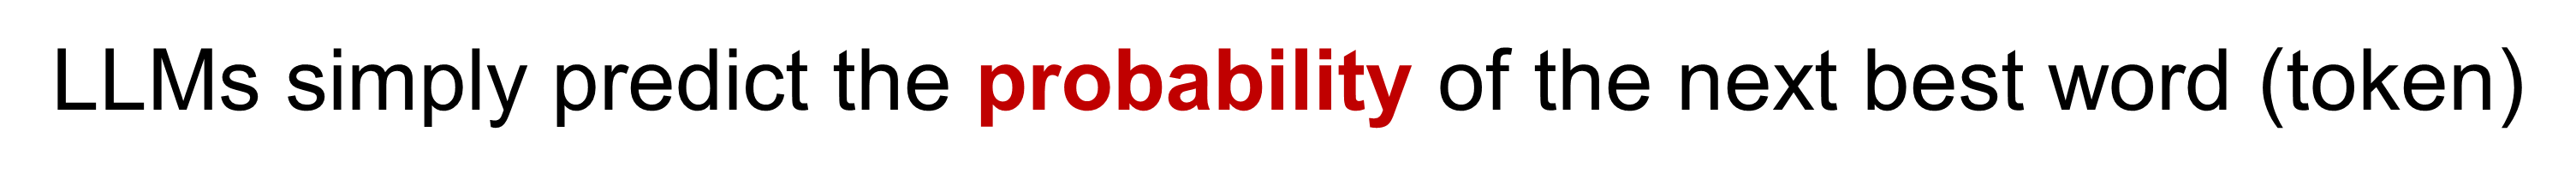

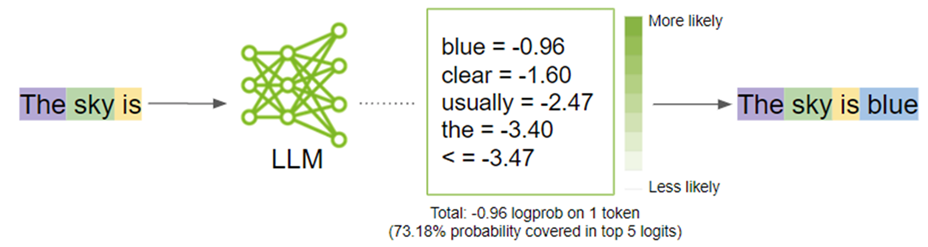

## The pricing is based on a per 1,000 tokens basis.
There are multiple models available, each offering various capabilities and price points.

https://openai.com/pricing

Below function counts the tokens for the message passed to gpt-3.5-turbo or gpt-4.

In [13]:
# Lets make a call to a GPT model and see what is the token count
response = openai.chat.completions.create(
  model="gpt-3.5-turbo-0125",
  messages=[
    {
      "role": "user",
      "content": "Write a joke about Data Scientists"
    }
  ],
  temperature=1,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

In [14]:
print(response.choices[0].message.content)

Why did the data scientist break up with their significant other?
Because they couldn't handle the unpredictability of human behavior, but Excel spreadsheets are always there for them.


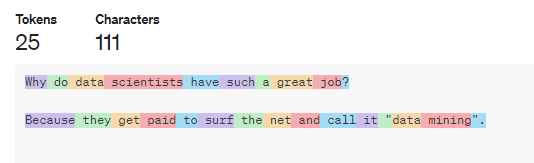

Check out the Token usage

In [15]:
response.usage

CompletionUsage(completion_tokens=34, prompt_tokens=13, total_tokens=47)

Check the response format and its contents

In [16]:
response

ChatCompletion(id='chatcmpl-8r2NcwZiDh0NggfvmbLhYzPxNkxzg', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Why did the data scientist break up with their significant other?\nBecause they couldn't handle the unpredictability of human behavior, but Excel spreadsheets are always there for them.", role='assistant', function_call=None, tool_calls=None))], created=1707651224, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint='fp_69829325d0', usage=CompletionUsage(completion_tokens=34, prompt_tokens=13, total_tokens=47))